

# DSI - 16 Capstone Project -  Personality Prediction 


## **Part 1 - EDA and data processing**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-1---EDA-and-data-processing" data-toc-modified-id="Part-1---EDA-and-data-processing-1"><strong>Part 1 - EDA and data processing</strong></a></span></li><li><span><a href="#Notebook-Organization" data-toc-modified-id="Notebook-Organization-2">Notebook Organization</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-3">Introduction</a></span></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-4">Problem Statement</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-5">Methodology</a></span></li><li><span><a href="#Findings-and-Conclusion" data-toc-modified-id="Findings-and-Conclusion-6">Findings and Conclusion</a></span><ul class="toc-item"><li><span><a href="#References" data-toc-modified-id="References-6.1">References</a></span></li></ul></li><li><span><a href="#Data-Loading-and-Cleaning" data-toc-modified-id="Data-Loading-and-Cleaning-7">Data Loading and Cleaning</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-8">EDA</a></span><ul class="toc-item"><li><span><a href="#Data-Distribution" data-toc-modified-id="Data-Distribution-8.1">Data Distribution</a></span></li><li><span><a href="#Splitting-the-Dataset" data-toc-modified-id="Splitting-the-Dataset-8.2">Splitting the Dataset</a></span></li><li><span><a href="#Number-of-Subposts-per-type" data-toc-modified-id="Number-of-Subposts-per-type-8.3">Number of Subposts per type</a></span></li><li><span><a href="#Number-of-http-Links-for-each-type" data-toc-modified-id="Number-of-http-Links-for-each-type-8.4">Number of http Links for each type</a></span></li><li><span><a href="#Avg-Words-per-comment-for-each-type" data-toc-modified-id="Avg-Words-per-comment-for-each-type-8.5">Avg Words per comment for each type</a></span></li><li><span><a href="#Parts-of-Speech" data-toc-modified-id="Parts-of-Speech-8.6">Parts of Speech</a></span></li><li><span><a href="#Visualzing-the-different-types-of-POS-used-by-the-Personality-types" data-toc-modified-id="Visualzing-the-different-types-of-POS-used-by-the-Personality-types-8.7">Visualzing the different types of POS used by the Personality types</a></span></li><li><span><a href="#Cleaning-the-strings" data-toc-modified-id="Cleaning-the-strings-8.8">Cleaning the strings</a></span></li><li><span><a href="#Word-Cloud-&amp;--Most-Used-Words" data-toc-modified-id="Word-Cloud-&amp;--Most-Used-Words-8.9">Word Cloud &amp;  Most Used Words</a></span></li><li><span><a href="#Mapping-out-each-type-based-on-Axis" data-toc-modified-id="Mapping-out-each-type-based-on-Axis-8.10">Mapping out each type based on Axis</a></span></li></ul></li><li><span><a href="#Saving-dataframe-to-file-for-modelling-use" data-toc-modified-id="Saving-dataframe-to-file-for-modelling-use-9">Saving dataframe to file for modelling use</a></span></li></ul></div>

## Notebook Organization

This project is organized into 3 different notebooks with the following parts

- **Part 1: Business Problem, Loading in the dataset, EDA and data-preprocessing**
  - Identification of the business problem
  - The Approach to solve the problem
  - Load raw data 
  - EDA (data distribution, Number of subposts, number of links, number of words/POS, word cloud)
  - Cleaning of strings (removal of URL, remove NLTK stop words, remove target related words)
  - Word cloud and common words for each type
  - Mapping the data based on type traits
  - Saving file for Modelling use
 
- Part 2: [Multi Class Modelling (16 Classes for the personality type) ](Capstone_Personality_Prediction_Multiclass_Modelling.ipynb)
- Part 3: [Binary Class Modelling (4 Binary Classification based on each I-E, N-S, T-F, J-P axes)](Capstone_Personality_Prediction_Binary_Modelling.ipynb)

In this notebook, we will cover the introduction and problem statement for this project, load the dataset, perform EDA on the dataset and saving the processed dataset into another file.
```mbti_cleaned.csv```

## Introduction

When hiring today, employers take great care to make sure they find the right person for their open role. They review endless resumes, conduct phone screens and interviews, and may even have candidates take skills assessments. 

One of the most important things to evaluate in a new hire is their personality fit both with the team and with the role for which they are interviewing. The hiring manager can use these to understand how extroverted or introverted a candidate is, how they communicate, what motivates them, or even how resilient they are in the face of challenges – all key aspects of a particular le e.g. sales

In roles such as these that have a high degree of human interaction, it can be beneficial to understand how the candidate communicates, how they interact with others, or whether they focus on details or see the big picture.

The Myers-Briggs Type Indicator (MBTI) test is arguably one of the most well-known and common personality assessments used today. 89% of Fortune 100 companies use the Myers-Briggs assessment in their hiring process or in a professional development capacity.

**ABOUT MBTI:** 

*The Myers-Brigg typology is based on Jung’s theory of psychological types. It was constructed by the mother and daughter team of Katherine Cook Briggs and Isabel Briggs Myers. Katherine Briggs had used Jungian notions of personality to analyze characters in literature.*

*The essence of the theory is that much seemingly random variation in the behavior is actually quite orderly and consistent, being due to basic differences in the ways individuals **prefer** to use their perception and judgment.* [[1]](https://www.myersbriggs.org/my-mbti-personality-type/mbti-basics/)

MBTI evaluates the personality along 4 different traits, representing the way one processes the surrounding information based on their **preferences** (not ability) and natural tendencies. The four traits are:

**Extraversion (E) vs. Introversion (I)** - describes how a person gets their energy.
- **Introverts** are energized by spending quiet time alone or with a small group. They tend to be more reserved and thoughtful.
- **Extraverts** are energized by spending time with people and in busy, active surroundings. They tend to be more expressive and outspoken.

**Sensing (S) vs. Intuition (N)** - describes how a person takes in information.
- **Sensors** focus on their five senses and are interested in information they can directly see, hear, feel, and so on. They tend to be hands-on learners and are often described as "practical."

- **Intuitives** focus on a more abstract level of thinking; they are more interested in theories, patterns, and explanations. They are often more concerned with the future than the present and are often described as "creative."

**Thinking (T) vs. Feeling (F)** - describes how a person makes decisions.
- **Thinkers** tend to make decisions with their heads; they are interested in finding the most logical, reasonable choice.
- **Feelers** tend to make decisions with their hearts; they are interested in how a decision will affect people, and whether it fits in with their values.

**Judging (J) vs. Perceiving (P)** - describes how a person organizes their world.
- **Judgers** appreciate structure and order; they like things planned, and dislike last-minute changes.
- **Perceivers** appreciate flexibility and spontaneity; they like to leave things open so they can change their minds.


## Problem Statement

A psychological tool or personlity assessment is often used to help people in numerous organisations and institutions with leadership, influencing, change, career development, team-work, conflict, managing others, developing relationships and more besides. 

However, administering a full assessment can be 
- Tedious and time-consuming, sometimes invasive (for someone being assessed) -> Long Questionnaire
- Bias - Applicants may answer the assessment questions with what they think the manager wants to hear instead of their true feelings or tendencies, leading to biased results.
- Assessment questions may reflect more of a snapshot of the candidate at that moment in time, rather than how they think and act long term across multiple situations.

By developing a model that can predict the personality type through a someone's short text  messages on social media posts,  career advisers, recruiters and hiring managers can quickly assess candidates on how comfortable or adaptable will the candidate be in a certain role; They can also have better engagement with the candidates through their preferred way of thinking and behaving (e.g. Intuition Types prefer creative, big picture, long term development in career while Sensing Types would better relate with actual facts and scope of the any given role)

## Methodology

**Dataset**
To build a model for prediction, we make use of this [dataset from Kaggle](https://www.kaggle.com/datasnaek/mbti-type):
which was collected through the [PersonalityCafe](http://personalitycafe.com/forum/) forum, as it provides a large selection of people and their MBTI personality type, as well as what they have written.

This dataset contains over 8600 rows of data, on each row is a person’s:

- Type (This persons 4 letter MBTI code/type)
- A section of each of the last 50 things they have posted (Each entry separated by "|||" (3 pipe characters))

I did some cleaning of the data and EDA, after which using ``Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer`` to create the word vectors of about 70k+ features . 

After which , 2 approaches was taken to do the classifying:

**Approach 1:**
- Multiclass Classifier (across all 16 types)
- 5 folds cross validation using GridSearch
- Models: Logistic Regression, Naive Bayes, Random Forest, XGBoost
- Metrics: F1-Score, Matthews Correlation Coefficient (MCC) Score

**Approach 2:**
- Binary Classifiers for each MBTI traits (I vs E, N vs S, F vs T, J vs P)
- 5 folds cross validation using GridSearch
- Models: Logistic Regression, XGBoost
- Metrics: AUC ROC score

## Findings and Conclusion

**Data**

The data was highly imbalanced in the classes, with type **INFP** being the majority class. From the WordCloud, it also shows that the words used among the classes are very similar. Initital thought is that the multi-class classifier may not perform well. 

**Modelling**

Truth enough, **Approach 1 with multiclassifer** only achieved best result of **35%** accuracy with F1-score of **0.36** using **Logistic Regression**. Even after applying SMOTETomek to combine over and undersampling to balance out the data, as well as using several vectors (n-gram, Doc2Vec) techniques but none of those improved the results. 

Next, **Approach 2 of 4 x binary classifer** also did not provide satisfactory results. All traits have borderline AUC ROC score of **0.5**, which means they are not capable to classify the classes. They can perform well on majority classes but will not do well in the minority classes.

**Conclusion**

Based on the findings, the conclusion i draw is:

- The dataset available is not comprehensive enough to determine the various types
- Certain personality traits may not be defined well in words or language. e.g. Introversion and Extroversion may not be distingusiable using language, but then again, the data we have for E types are much lesser than I types
- Personality Trait is a far more complex area and more than just words, and language expression.  Even with the most in-depth assessment, it can be difficult to truly measure the nuances of human behavior and distil it into a certain category or type. 
- More research needs to be done to determine if in future we are able to predict the personality just by text alone.

### References

[1] https://www.myersbriggs.org/my-mbti-personality-type/mbti-basics/

[2] https://www.16personalities.com/personality-types

[3] https://www.psychologyjunkie.com/2018/06/19/how-to-spot-each-myers-briggs-personality-type-in-conversation/

[4] https://medium.com/@makingbusinessmatter/the-ultimate-guide-to-myers-briggs-29253737a966

[5] https://www.greeneresources.com/blog/culture/personality-tests-in-hiring/

In [1]:
import pandas as pd
pd.set_option('max_columns', 500) 
pd.set_option('max_rows', 500) 
pd.set_option('display.max_colwidth', 300)
pd.options.display.float_format = "{:,.3f}".format

import numpy as np

# Visualization Imports
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
# sns.set_style("whitegrid")

#API imports
import requests
import time
import random

from collections import Counter
from bs4 import BeautifulSoup

#Regex
import regex as re

#nlp

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


from nltk.stem import WordNetLemmatizer

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.util import ngrams


# Gensim

import gensim, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.doc2vec import TaggedDocument

# Using SpaCy
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

#word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn import utils


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rachel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Loading and Cleaning

In [2]:
#mounting the google drive
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#df = pd.read_csv('/content/drive/My Drive/Data Science/GA DSI/Working files/DSI Working/Project1234/Project-capstone project/datasets/mbti_1.csv')
df = pd.read_csv('data/mbti_1.csv')

In [4]:
df.shape

(8675, 2)

This dataset contains 8675 rows of data, on each row is a person’s:

- Type (This persons 4 letter MBTI code/type)
- A section of each of the last 50 things they have posted (Each entry separated by "|||" (3 pipe characters))

In [5]:
df.head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-chan...
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|...
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I ..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existe..."
4,ENTJ,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His ...
5,INTJ,"'18/37 @.@|||Science is not perfect. No scientist claims that it is, or that scientific information will not be revised as we discover new things. Rational thinking has been very useful to our society....|||INFP- Edgar Allen Poe was an INFP and he's in your siggy.|||People see the obvious Fi..."
6,INFJ,"'No, I can't draw on my own nails (haha). Those were done by professionals on my nails. And yes, those are all gel. You mean those you posted were done by yourself on your own nails? Awesome!|||Probably the Electronic Screen Syndrome. With the advent of technology and social media, we all suffe..."
7,INTJ,"'I tend to build up a collection of things on my desktop that i use frequently and then move them into a folder called 'Everything' from there it get sorted into type and sub type|||i ike to collect odd objects, even at work...a lot of people would call it junk but i like to collect it. Old un..."
8,INFJ,"I'm not sure, that's a good question. The distinction between the two is so dependant on perception. To quote Robb Flynn, ''The hate you feel is nothing more, than love you feel to win this war.''|||Good question! It's tough to say for sure but I loved Winona Ryder as Lydia in Beetlejuice... ht..."
9,INTP,"'https://www.youtube.com/watch?v=w8-egj0y8Qs|||I'm in this position where I have to actually let go of the person, due to a various reasons. Unfortunately I'm having trouble mustering enough strength to actually pull through it. Sometimes,...|||WHAT A YEAR, MAN. WHAT A YEAR. I am just utterly ..."


In [6]:
df.isnull().sum()

type     0
posts    0
dtype: int64

There are no NULL values in the data

## EDA

### Data Distribution 

In [7]:
pd.DataFrame({'count': df['type'].value_counts(),
              '%_spread': df['type'].value_counts(normalize=True)}
            ).sort_values('count', ascending=False)

#df['type'].value_counts(normalize=True)

,count,%_spread
INFP,1832,0.211
INFJ,1470,0.169
INTP,1304,0.150
INTJ,1091,0.126
ENTP,685,0.079
ENFP,675,0.078
ISTP,337,0.039
ISFP,271,0.031
ENTJ,231,0.027
ISTJ,205,0.024


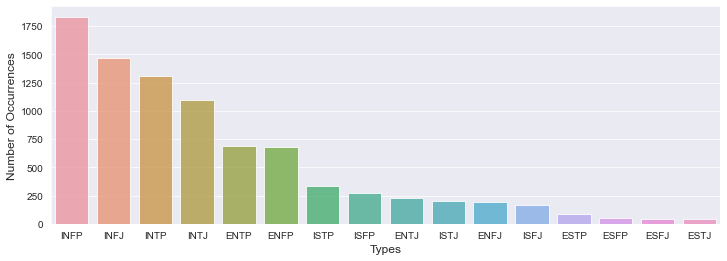

In [8]:
cnt_types = df['type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_types.index, cnt_types.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

The dataset is not very balanced! We have more INFP posting as compared to ESFJ. Initial thoughts could be that E-type (Extraverts) prefer spending time with people and in busy, active surroundings, hence do not take to online social media as much as intraverts

### Splitting the Dataset 

Each observations contains last 50 things the person have posted (Each entry separated by "|||" (3 pipe characters))
We will proceed to check if each posters have 50 posts

In [9]:
def print_post(index):
    example = df[df.index == index][['posts', 'type']].values[0]
    if len(example) > 0:
        print(example[0])
        print('type: ', example[1])
        print('length of post: ', len(example[0]))

In [10]:
#take a look at a sample post:
print_post(8612)

You tell him! Christ.  I do wanna thank everyone for their input so far.|||Um we're lesbians...|||She just quit her canvassing job and I'm proud of her for standing up for herself. She's DEFINITELY a gifted writer, but she's more of a poet. I'm not sure how you incorporate that in a job...|||I showed her the posts and I think she's going to look into the libraries...she IS an avid reader, after all. Any other ideas in case this doesn't work out?|||Thanks! I'm glad I could make someone laugh!|||Yes, you bet your ass I can.   I swear I'm sober. Just FYI.|||What, I can't talk about what pretty much everyone does during lonely nights? I AM A SEXUAL 8.   And my girlfriend LOVES it.|||INFPs are adorable. I don't know what I'd do without mine...oh wait. Yes I do. I'd be masturbating a lot more and leaving the house recreationally less.|||TootsieBear267 Thank you! It comes naturally. XD|||What would you like to read?|||Hello all,  Yeah, yeah, an ENTJ posting in your thread.  I have a (very ser

In [11]:
print_post(2)

'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there.    And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven't visited this website in the last 3 

In [12]:
#after spliting 
df.loc[8612:8612]['posts'].values[0].split("|||")

['You tell him! Christ.  I do wanna thank everyone for their input so far.',
 "Um we're lesbians...",
 "She just quit her canvassing job and I'm proud of her for standing up for herself. She's DEFINITELY a gifted writer, but she's more of a poet. I'm not sure how you incorporate that in a job...",
 "I showed her the posts and I think she's going to look into the libraries...she IS an avid reader, after all. Any other ideas in case this doesn't work out?",
 "Thanks! I'm glad I could make someone laugh!",
 "Yes, you bet your ass I can.   I swear I'm sober. Just FYI.",
 "What, I can't talk about what pretty much everyone does during lonely nights? I AM A SEXUAL 8.   And my girlfriend LOVES it.",
 "INFPs are adorable. I don't know what I'd do without mine...oh wait. Yes I do. I'd be masturbating a lot more and leaving the house recreationally less.",
 'TootsieBear267 Thank you! It comes naturally. XD',
 'What would you like to read?',
 "Hello all,  Yeah, yeah, an ENTJ posting in your threa

In [13]:
item = df.loc[8612:8612]['posts'].values[0].split("|||")

print(item)
print(len(item))

['You tell him! Christ.  I do wanna thank everyone for their input so far.', "Um we're lesbians...", "She just quit her canvassing job and I'm proud of her for standing up for herself. She's DEFINITELY a gifted writer, but she's more of a poet. I'm not sure how you incorporate that in a job...", "I showed her the posts and I think she's going to look into the libraries...she IS an avid reader, after all. Any other ideas in case this doesn't work out?", "Thanks! I'm glad I could make someone laugh!", "Yes, you bet your ass I can.   I swear I'm sober. Just FYI.", "What, I can't talk about what pretty much everyone does during lonely nights? I AM A SEXUAL 8.   And my girlfriend LOVES it.", "INFPs are adorable. I don't know what I'd do without mine...oh wait. Yes I do. I'd be masturbating a lot more and leaving the house recreationally less.", 'TootsieBear267 Thank you! It comes naturally. XD', 'What would you like to read?', "Hello all,  Yeah, yeah, an ENTJ posting in your thread.  I have

In [14]:
#splitting each record into individual posts.
#df['list_posts'] = df['posts'].map(lambda p: p.split('|||'))

### Number of Subposts per type

In [15]:
#total posts per user
df['num_posts'] = df['posts'].map(lambda p: len(p.split('|||')))
df.loc[8612:8612]['num_posts']

8612    19
Name: num_posts, dtype: int64

In [16]:
df[(df['num_posts'] != 50)]

,type,posts,num_posts
11,ENFJ,'https://www.youtube.com/watch?v=PLAaiKvHvZs|||51 :o|||I went through a break up some months ago. We were together for 4 years and I had planned my life around that relationship. I wasn't the one breaking the relationship as you might imagine and all our...|||ENFJ Puns so many puns.|||Well I per...,43
16,INFJ,'some of these both excite and calm me: BUTTS bodies brains community gardens camping camping with dogs hiking with dogs chillin with animals|||I would hope that no one engages the INTP's baiting and Christianity 101 b.s. ...... That will go nowhere.|||I hope I am not being misunderstood...,49
23,INFP,"'45016 urh sorry uh. couldn't resist.|||all of you enfjs, please collectively marry me.|||When an ENFJ is interested in you, you will know it. :D enfjs are my favorite for this reason.|||she seems to have a similar vibe to this girl. i can't tell if she's infp or infj, actually. (she seems to li...",28
28,INFP,"'Basically, my main questions are : What do you believe in ? What are the values that matter the most to you ?* (Sorry if I tend to be confusing)|||Hey, This is my second thread today, but I feel like this is important. Well... Every time we try something new, we are scared, which is normal rig...",48
54,INFP,"'I love reading, and I wish I wasn't allergic to dust, so I could read all those beautiful, old, dusty books. I love seeing people smile.|||I like using teaspoons rather tan tablespoons, even for soup :)|||I love funky knee socks!|||When you're about to go abroad for 10 months, on a trip you've ...",42
...,...,...,...
8612,ENTJ,"You tell him! Christ. I do wanna thank everyone for their input so far.|||Um we're lesbians...|||She just quit her canvassing job and I'm proud of her for standing up for herself. She's DEFINITELY a gifted writer, but she's more of a poet. I'm not sure how you incorporate that in a job...|||I s...",19
8617,ENFP,'Thank you! I look forward to connecting with others on the forum. It seems like many of the names have changed!|||I've learned to cultivate & appreciate my strengths and to acknowledge & work on my weaknesses. 4 years now. MBTI has essentially shaped my confidence and given me a great appreciat...,74
8629,INTP,"'A chimichanga.|||Hello, dear fellow café-members. Let´s try to work off the questions. 1. Before you came to this 'ere site - Were you happy with your life? Did you think you were happy, but on reflection,...|||In school, I spent most of my spare time in the library! :cool:|||I´ve only heard t...",37
8640,INTP,"'This is a great thread... I find it interesting how different two types that are close can really be. Like how different my INTJ fiance and I are.. or how different he and his INFJ sister. And how...|||Thanks for the link, looks like it will be helpful. Im only sure of my variant stacking, and...",35


In [17]:
#check if there are posts which has less than 50
df[df['num_posts'] != 50].shape

(1088, 3)

There are 1088 records that does not have 50 posts. 

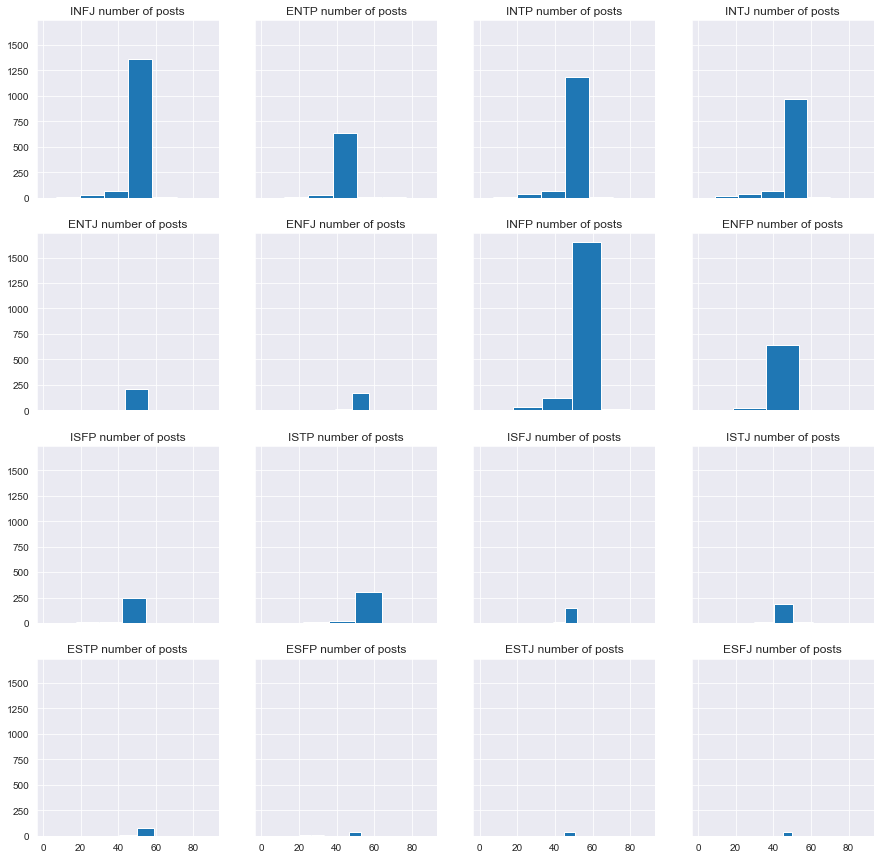

In [18]:
fig, ax = plt.subplots(nrows = int(len(df['type'].unique())/4), ncols=4, sharex=True, sharey=True, figsize=(15,15))

k = 0
ax = ax.ravel()

for i in df['type'].unique():
    df_1 = df[(df['type'] == i)]['num_posts']
    ax[k].hist(df_1, bins=5)
    ax[k].set_title(i + " number of posts", fontsize = 12)
    k += 1

In [19]:
number_posts = pd.DataFrame({
    'num_post': df.groupby('type')['num_posts'].mean()})
number_posts

,num_post
type,
ENFJ,48.884
ENFP,48.547
ENTJ,48.801
ENTP,49.286
ESFJ,48.048
ESFP,46.146
ESTJ,49.256
ESTP,48.730
INFJ,49.051


### Number of http Links for each type

In [20]:
df['num_http'] = df['posts'].apply(lambda x: x.count('http'))
pd.DataFrame({'num_https': df.groupby('type')['num_http'].mean()})

,num_https
type,
ENFJ,2.663
ENFP,2.523
ENTJ,2.658
ENTP,2.413
ESFJ,1.357
ESFP,2.771
ESTJ,2.641
ESTP,3.236
INFJ,3.294


### Avg Words per comment for each type
- investigate on average words per comment for each personality type

In [21]:
def countwords(text): 
    item = re.findall('\w+', text)
    return len(item)

In [22]:
#avg words per comment
df['words_per_comment'] = df['posts'].apply(lambda x: countwords(x)/df['num_posts'].values[0])
df.loc[8610:8612]['words_per_comment']

8610   30.260
8611   27.260
8612    7.580
Name: words_per_comment, dtype: float64

In [23]:
#roughly gauge the avg words per comment for each type
df_words_per_comment = df.groupby("type")['words_per_comment'].mean().sort_values(ascending=False)
df_words_per_comment

type
ENFJ   28.028
INFJ   27.957
ESFJ   27.955
ENFP   27.475
INFP   27.319
ISFJ   27.258
ESTJ   26.831
ISTJ   26.624
ENTJ   26.615
ENTP   26.395
INTP   26.370
INTJ   26.187
ISTP   25.800
ESTP   25.522
ISFP   25.233
ESFP   22.588
Name: words_per_comment, dtype: float64

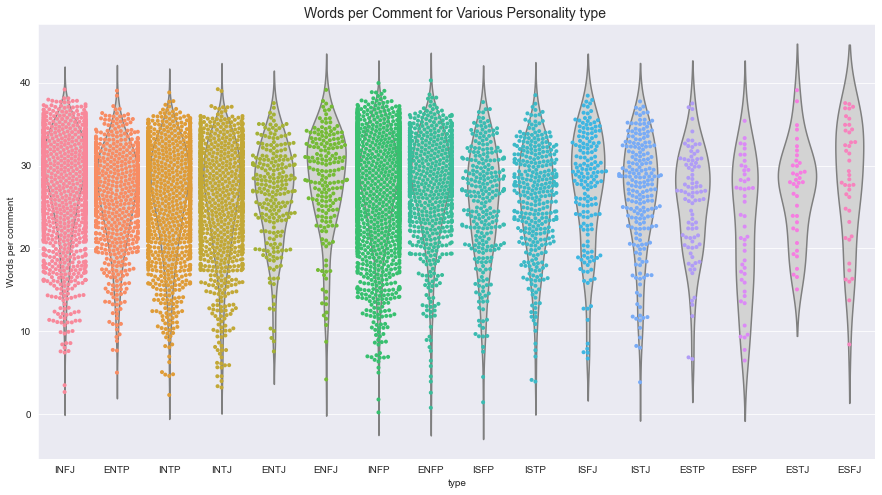

In [24]:
plt.figure(figsize=(15,8))
sns.violinplot(x='type', y='words_per_comment', data=df, inner=None, color='lightgray')
sns.swarmplot(x='type', y='words_per_comment', data=df, size=4)
plt.title("Words per Comment for Various Personality type ", fontsize=14)
plt.ylabel('Words per comment')
plt.show()

In [25]:
df.head(5)

,type,posts,num_posts,num_http,words_per_comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-chan...,50,24,16.060
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|...,50,10,26.820
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I ...",50,5,18.660
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existe...",50,2,23.520
4,ENTJ,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His ...,50,6,21.880


In [26]:
df.columns

Index(['type', 'posts', 'num_posts', 'num_http', 'words_per_comment'], dtype='object')

### Parts of Speech

Part of Speech Tagging involves identifying the part of speech for every word. Using SpaCy library to tokenize and tagging the posts, we try to determine if a certain personality types uses more of a POS, particularly:

- nouns ("NOUN")- s a word that functions as the name of a specific object or set of objects
- verbs ("VERB") - action words in a sentence that describe what the subject is doing
- adjectives ("ADJ") - modifies a noun or noun phrase or describes its referent
- Interjections ("INTJ") -  demonstrates the emotion or feeling

Columns with only Nouns, Verbs, Adjectives will also be added to be possibily used as features 

In [27]:
nlp = spacy.load("en_core_web_sm")

In [28]:
def postag(text):   
    
    """
    Function to split the posts into individual comments from separator |||, 
    for each comments, separate the nouns, verbs, adjectives, and interjections
    count the total of POS tags for the whole text
    return the dataframe with the list of POS and the average count
    
    Takes in arguements:
    text - unprocessed text with each comment seperated by '|||'
    
    Returns:
    average count of noun, verb, adjectives, interjections
    """
    
    #split each posts into a list
    ls_text = text.split('|||')
    
    num_posts = len(ls_text)
    #print('total posts: ', num_posts)
    
    cn_nouns = 0
    cn_verbs = 0
    cn_adjs = 0
    cn_intjs = 0
    
    ##feed each subpost into nlp
    for i, item in enumerate(ls_text):    
        
        """
        print('post ', i+1, ' of ', len(ls_text))
        print()
        
        print("text item: ", item)
        print("no of words: ", len(item.split()))
        print()
        """
        
        #extracting the POS
        doc = nlp(item)
        #count the number of verbs, nouns, adjectives and interjections
        c = Counter(token.pos_ for token in doc)
          
        cn_nouns += c['NOUN']
        cn_verbs += c['VERB']
        cn_adjs  += c['ADJ']
        cn_intjs += c['INTJ']
       
    return [cn_nouns/num_posts, cn_verbs/num_posts, cn_adjs/num_posts, cn_intjs/num_posts]

In [29]:
#testing on one records for function
postag(df.loc[2:2]['posts'].values[0])

[2.96, 2.54, 1.68, 0.24]

In [32]:
#testing on one records 
postag(df.loc[8612:8612]['posts'].values[0])

[2.4210526315789473,
 3.0526315789473686,
 1.4210526315789473,
 0.5263157894736842]

In [33]:

%%time
#try out on 1000 rows
df1 = df.loc[1000:2000]['posts'].map(lambda x: pd.Series(postag(x), 
                                      index=['nouns_per_commment', 
                                             'verbs_per_comment', 
                                             'adj_per_comment', 
                                            'interject_per_comment']))

df1

Wall time: 8min 2s


1000    nouns_per_commment      5.020
verbs_per_comment       4.860
adj_per_comment         2.280
interject_per_comment   0.160
dtype: float64
1001    nouns_per_commment      3.300
verbs_per_comment       3.260
adj_per_comment         1.360
interject_per_comment   0.240
dtype: float64
1002    nouns_per_commment      3.320
verbs_per_comment       4.200
adj_per_comment         1.840
interject_per_comment   0.460
dtype: float64
1003    nouns_per_commment      3.040
verbs_per_comment       2.740
adj_per_comment         1.100
interject_per_comment   0.380
dtype: float64
1004    nouns_per_commment      4.380
verbs_per_comment       5.260
adj_per_comment         1.880
interject_per_comment   0.320
dtype: float64
                                                                         ...                                                                  
1996    nouns_per_commment      2.720
verbs_per_comment       2.420
adj_per_comment         1.420
interject_per_comment   0.160
dtype: float64

In [36]:
type(df1)

pandas.core.series.Series

In [37]:
%%time
#applying to the whole dataset
df_POS = df['posts'].map(lambda x: pd.Series(postag(x), 
                                      index=['nouns_per_commment', 
                                             'verbs_per_comment', 
                                             'adj_per_comment', 
                                            'interject_per_comment']))



Wall time: 1h 10min 23s


In [38]:
#converting the extracted words into a dataframe and concatenating to the 
df2= pd.DataFrame(columns = ['nouns_per_commment', 
                             'verbs_per_comment', 
                             'adj_per_comment',
                             'interject_per_comment'])

for i, item in enumerate(df_POS):
      df2.loc[i] = item.values


In [39]:
df = pd.concat([df, df2], axis=1)

In [40]:
df.columns

Index(['type', 'posts', 'num_posts', 'num_http', 'words_per_comment',
       'nouns_per_commment', 'verbs_per_comment', 'adj_per_comment',
       'interject_per_comment'],
      dtype='object')

In [41]:
df.loc[8612:8612]

,type,posts,num_posts,num_http,words_per_comment,nouns_per_commment,verbs_per_comment,adj_per_comment,interject_per_comment
8612,ENTJ,"You tell him! Christ. I do wanna thank everyone for their input so far.|||Um we're lesbians...|||She just quit her canvassing job and I'm proud of her for standing up for herself. She's DEFINITELY a gifted writer, but she's more of a poet. I'm not sure how you incorporate that in a job...|||I s...",19,0,7.580,2.421,3.053,1.421,0.526


In [42]:
df.groupby('type')['words_per_comment'].mean()

type
ENFJ   28.028
ENFP   27.475
ENTJ   26.615
ENTP   26.395
ESFJ   27.955
ESFP   22.588
ESTJ   26.831
ESTP   25.522
INFJ   27.957
INFP   27.319
INTJ   26.187
INTP   26.370
ISFJ   27.258
ISFP   25.233
ISTJ   26.624
ISTP   25.800
Name: words_per_comment, dtype: float64

### Visualzing the different types of POS used by the Personality types

In [44]:
data_preproc = pd.DataFrame({
    'words_per_comment': df.groupby('type')['words_per_comment'].mean(),
    'nouns_per_commment': df.groupby('type')['nouns_per_commment'].mean(),
    'verbs_per_comment': df.groupby('type')['verbs_per_comment'].mean(),
    'adj_per_comment': df.groupby('type')['adj_per_comment'].mean(),
    'interject_per_comment': df.groupby('type')['interject_per_comment'].mean(),
    'num_http': df.groupby('type')['num_http'].mean()}

)

data_preproc.reset_index(level='type', inplace=True)

In [65]:
data_preproc

,type,words_per_comment,nouns_per_commment,verbs_per_comment,adj_per_comment,interject_per_comment,num_http
0,ENFJ,28.028,3.931,4.067,1.962,0.344,2.663
1,ENFP,27.475,3.928,3.941,1.951,0.347,2.523
2,ENTJ,26.615,4.047,3.807,1.924,0.264,2.658
3,ENTP,26.395,3.946,3.710,1.893,0.274,2.413
4,ESFJ,27.955,3.981,4.062,1.980,0.281,1.357
5,ESFP,22.588,3.407,3.382,1.600,0.307,2.771
6,ESTJ,26.831,3.809,3.892,1.759,0.262,2.641
7,ESTP,25.522,3.809,3.644,1.729,0.283,3.236
8,INFJ,27.957,4.036,3.995,1.979,0.279,3.294
9,INFP,27.319,3.947,3.869,1.956,0.265,3.771


Text(0, 0.5, 'Parts of Speech Count')

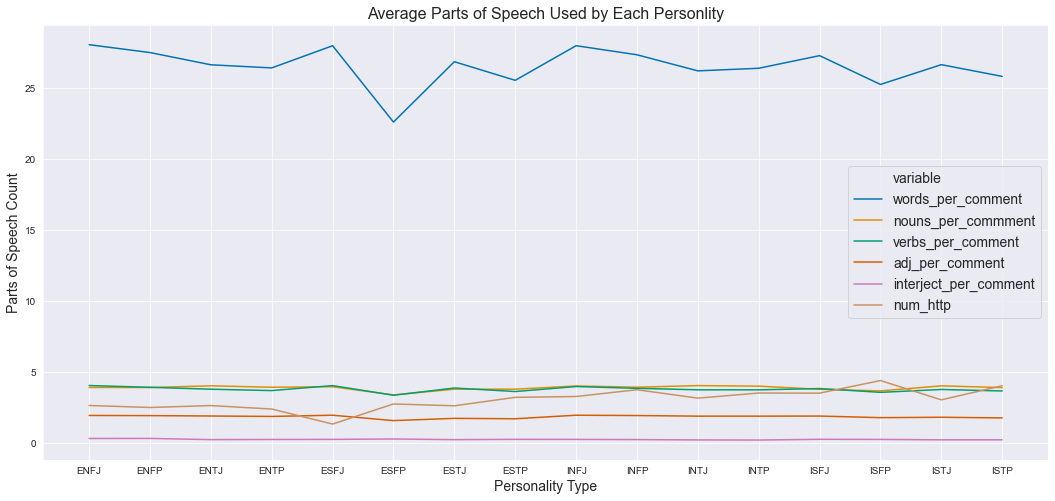

In [45]:
plt.figure(figsize=(18,8))
sns.lineplot(x='type', y='value', hue='variable', 
             data=pd.melt(data_preproc, id_vars='type'),
             ci = None, 
             legend = 'full', palette = 'colorblind')

plt.legend(fontsize = 14)
plt.title('Average Parts of Speech Used by Each Personlity', fontsize=16)
plt.xlabel('Personality Type',fontsize=14)
plt.ylabel('Parts of Speech Count',fontsize=14)

There is no significant difference in the usage of POS for the individual personality types. So average POS counts has no impact as a feature for our models

In [74]:


data_total = pd.DataFrame({
    'type_count' : df.groupby('type')['words_per_comment'].count(),
    #'words_count': df.groupby('type')['words_per_comment'].sum(),
    'nouns_count': df.groupby('type')['nouns_per_commment'].sum(),
    'verbs_count': df.groupby('type')['verbs_per_comment'].sum(),
    'adj_count': df.groupby('type')['adj_per_comment'].sum(),
    'interject_count': df.groupby('type')['interject_per_comment'].sum(),
    'num_http': df.groupby('type')['num_http'].sum()}

)

data_total.reset_index(level='type', inplace=True)

data_total

,type,type_count,nouns_count,verbs_count,adj_count,interject_count,num_http
0,ENFJ,190,746.819,772.674,372.750,65.398,506
1,ENFP,675,"2,651.254","2,659.966","1,316.733",234.178,1703
2,ENTJ,231,934.760,879.466,444.487,60.932,614
3,ENTP,685,"2,702.784","2,541.531","1,296.806",187.656,1653
4,ESFJ,42,167.181,170.604,83.150,11.783,57
5,ESFP,48,163.525,162.358,76.794,14.754,133
6,ESTJ,39,148.541,151.790,68.584,10.214,103
7,ESTP,89,338.977,324.284,153.916,25.146,288
8,INFJ,1470,"5,933.150","5,872.631","2,909.804",410.142,4842
9,INFP,1832,"7,231.236","7,087.504","3,584.139",485.621,6909


Text(0, 0.5, 'Parts of Speech Count')

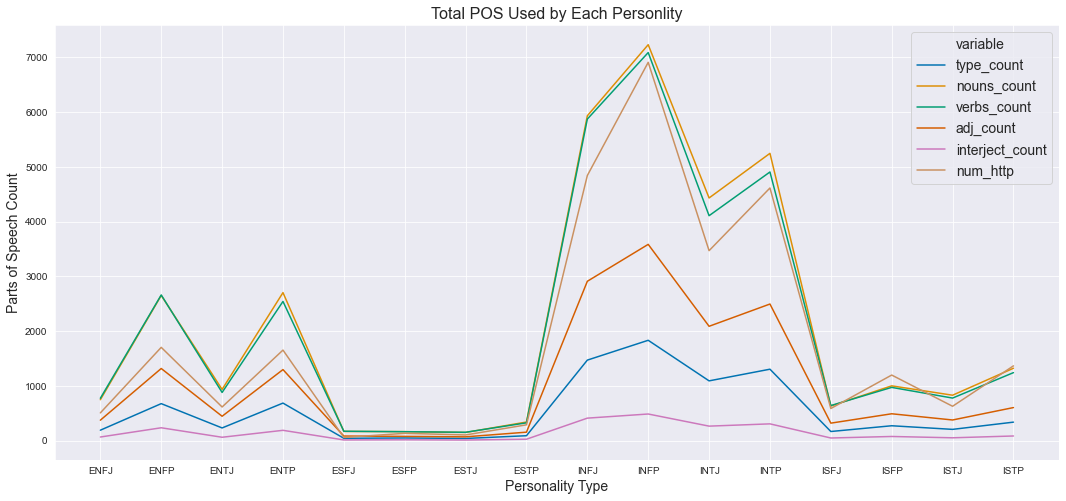

In [75]:
plt.figure(figsize=(18,8))
sns.lineplot(x='type', y='value', hue='variable', 
             data=pd.melt(data_total, id_vars='type'),
             ci = None, 
             legend = 'full', palette = 'colorblind')

plt.legend(fontsize = 14)
plt.title('Total POS Used by Each Personlity', fontsize=16)
plt.xlabel('Personality Type',fontsize=14)
plt.ylabel('Parts of Speech Count',fontsize=14)

The total count of POS and urls for each type somewhat correspond to the number of records for each type. 

### Cleaning the strings

In [46]:
def clean_text(data, add_stopwords=None, lem_stem=None):
    
    """
    Function to convert raw text to words for processing.
    Function will remove all irrevant characters(or digits), HTML tags, stopwords), 

    
    Takes in arguement:
    text- str the raw text to be converted
    add_stopwords - list of additional stopwords that needs to be added
    lem_stem - type of Lemmatization or stemming to be done
    
    return the processed text in string 
    """   
    
    #remove all URL strings
    URL_RE = re.compile(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))')

    #all non word characters
    #REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')

    #all non word characters
    SYMBOLS_RE = re.compile('[^a-zA-Z]')
    
    STOPWORDS = set(stopwords.words('english'))
    
    if add_stopwords is not None:
        STOPWORDS.update(add_stopwords)
    #print("stop words ", STOPWORDS)
    
    #text = BeautifulSoup(data, 'lxml').text # remove HTML tags
    #print("removed html tags: ", text)
    #print()
    text = data.lower() # lowercase whole text
    
    text = URL_RE.sub('urlstr', text) #capturing the url 
    #text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = SYMBOLS_RE.sub(' ', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    
    text_list = [word for word in text.split() if word not in STOPWORDS] # delete stopwords from text
    
    if lem_stem == 'lem':
        lemmatizer = WordNetLemmatizer()
        text_processed = [lemmatizer.lemmatize(w) for w in text_list]
    elif lem_stem == 'stemp':
        #5 Stemming
        stemmer = PorterStemmer()
        text_processed = [stemmer.stem(w) for w in text_list]
    elif lem_stem == 'stems':
        stemmer = SnowballStemmer("english")
        text_processed = [stemmer.stem(w) for w in text_list]
    else:
        text_processed = text_list
    
    #return the list of cleaned, processed words
    return text_processed
    

In [47]:
#clean and tokenized the data
type_stopword = [x.lower() for x in df['type'].unique()]
type_stopwords = type_stopword + [x + 's' for x in type_stopword]
type_stopwords

['infj',
 'entp',
 'intp',
 'intj',
 'entj',
 'enfj',
 'infp',
 'enfp',
 'isfp',
 'istp',
 'isfj',
 'istj',
 'estp',
 'esfp',
 'estj',
 'esfj',
 'infjs',
 'entps',
 'intps',
 'intjs',
 'entjs',
 'enfjs',
 'infps',
 'enfps',
 'isfps',
 'istps',
 'isfjs',
 'istjs',
 'estps',
 'esfps',
 'estjs',
 'esfjs']

In [48]:
df['wordslist'] = df['posts'].map(lambda x: clean_text(x, add_stopwords=type_stopwords))

In [49]:
df.loc[8612:8612][['type','wordslist']]

,type,wordslist
8612,ENTJ,"[tell, christ, wanna, thank, everyone, input, far, um, lesbians, quit, canvassing, job, proud, standing, definitely, gifted, writer, poet, sure, incorporate, job, showed, posts, think, going, look, libraries, avid, reader, ideas, case, work, thanks, glad, could, make, someone, laugh, yes, bet, a..."


In [50]:
df['cleaned_str'] = df['wordslist'].str.join(" ")

In [51]:
print(df.loc[8612:8612]['cleaned_str'])
print(len(df.loc[8612:8612]['cleaned_str'].values[0]))
#print(type(df.loc[322:325]['cleaned_str']))

8612    tell christ wanna thank everyone input far um lesbians quit canvassing job proud standing definitely gifted writer poet sure incorporate job showed posts think going look libraries avid reader ideas case work thanks glad could make someone laugh yes bet ass swear sober fyi talk pretty much every...
Name: cleaned_str, dtype: object
1110


In [52]:
df.loc[8612:8612]['cleaned_str'].values[0]

'tell christ wanna thank everyone input far um lesbians quit canvassing job proud standing definitely gifted writer poet sure incorporate job showed posts think going look libraries avid reader ideas case work thanks glad could make someone laugh yes bet ass swear sober fyi talk pretty much everyone lonely nights sexual girlfriend loves adorable know without mine oh wait yes masturbating lot leaving house recreationally less tootsiebear thank comes naturally xd would like read hello yeah yeah posting thread serious girlfriend type rather upset lately job choices high school want minions mini mes sorry disappoint p thank guys like think fascinating hello everyone yuugi w sx sp enjoy long romantic walks house bar hopefully returning arms hobbies include world domination panic whenever lose something imperfect dammit welcome new well mentioned anime ones sent samsung sgh using tapatalk go teaching keep realistic depends long want school sent samsung sgh using tapatalk definitely n like li

In [53]:
df.drop(columns='wordslist', inplace=True)

### Word Cloud &  Most Used Words 
- Visualizing the 10 most used words

In [54]:
def findcommonwords(data, isstr=True, num_words=20, plot=True, color=None, ax=None):
    """
    Function to count the top number of wrords and display in a graph
    Takes in arguements:
    - data - list or string to count words
    - isstr - if True, data parsed in is a string, and needs to perform split into list 
    - num_words - count of the most common words
    - plot - if a graph is required to be plotted. 
    - color - defining the color. None for default
    - ax - the axes to be plot on
    
    Returns Dataframe of the common words and their count
    """
    if isstr:
        #splitting into individual words
        indiv_words = data.strip().split(" ")
        #print (indiv_words)
    else:
        indiv_words = data
        
    common = pd.DataFrame(Counter(indiv_words).most_common(num_words), columns=('words', 'count')).sort_values(by='count', ascending=False)
    
    if plot:
        
        sns.barplot(x='count', y='words', data=common, color=color, ax=ax)
        ax.set_yticklabels(common['words'])
        
    return common

In [55]:
df_5 = df.loc[8610:8615][['cleaned_str']]
df_5

,cleaned_str
8610,luftkopf think keep soft spot outliers people periphery society downtrodden weakest world people differently think think suggesting perhaps know found values opposed imposed values strength depth emotion different situations way could easily absolutely hate driving unless serine country road lit...
8611,thing comes mind going care character going care competence typically everyone cares character argument gives evidence person none e making stuff frustrated evidence stop melodramatic like urlstr world work whats current theory important life however prefer put mine missing several weeks afraid ...
8612,tell christ wanna thank everyone input far um lesbians quit canvassing job proud standing definitely gifted writer poet sure incorporate job showed posts think going look libraries avid reader ideas case work thanks glad could make someone laugh yes bet ass swear sober fyi talk pretty much every...
8613,logged account year gone wonder long would take time get bored computers find new obsession ninja love foreign languages speak hebrew native english german arabic understand read fine good speaking writing tongue beautiful sunset wish camera happy favourite top head urlstr urlstr krav maga lesso...
8614,really care birthday holidays general want drink coffee enjoy everyday also throw cuddles please chicory cuddling binge eating beer coffee nice candle yeah thing accountants really understand question long drop classes want enrolled end drop period fine semester want marry boyfriend sounds right...
8615,woah holy crap ever glad know someone else written easier explain would say preference listening mode response made lovely individual looking find focuses structural breakdown cognitive functions make letters soplar thank writing stuff like public forum easy find fact done courageous diary sorts...


In [56]:
len(df_5['cleaned_str'].values[0])

5233

0        think
1       people
2       values
3         know
4         love
5         like
6    different
7          way
8          get
9          may
Name: words, dtype: object

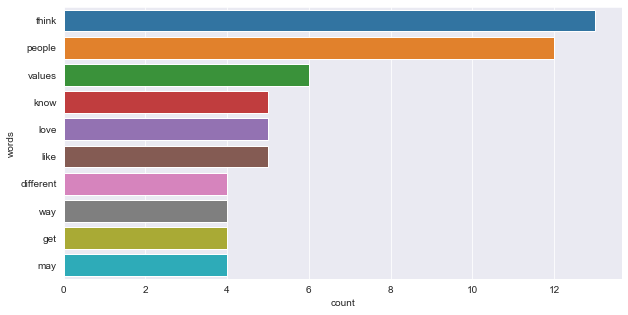

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
df_common = findcommonwords(df_5['cleaned_str'].values[0], isstr=True, num_words=10, plot=True, ax=ax)['words']
df_common

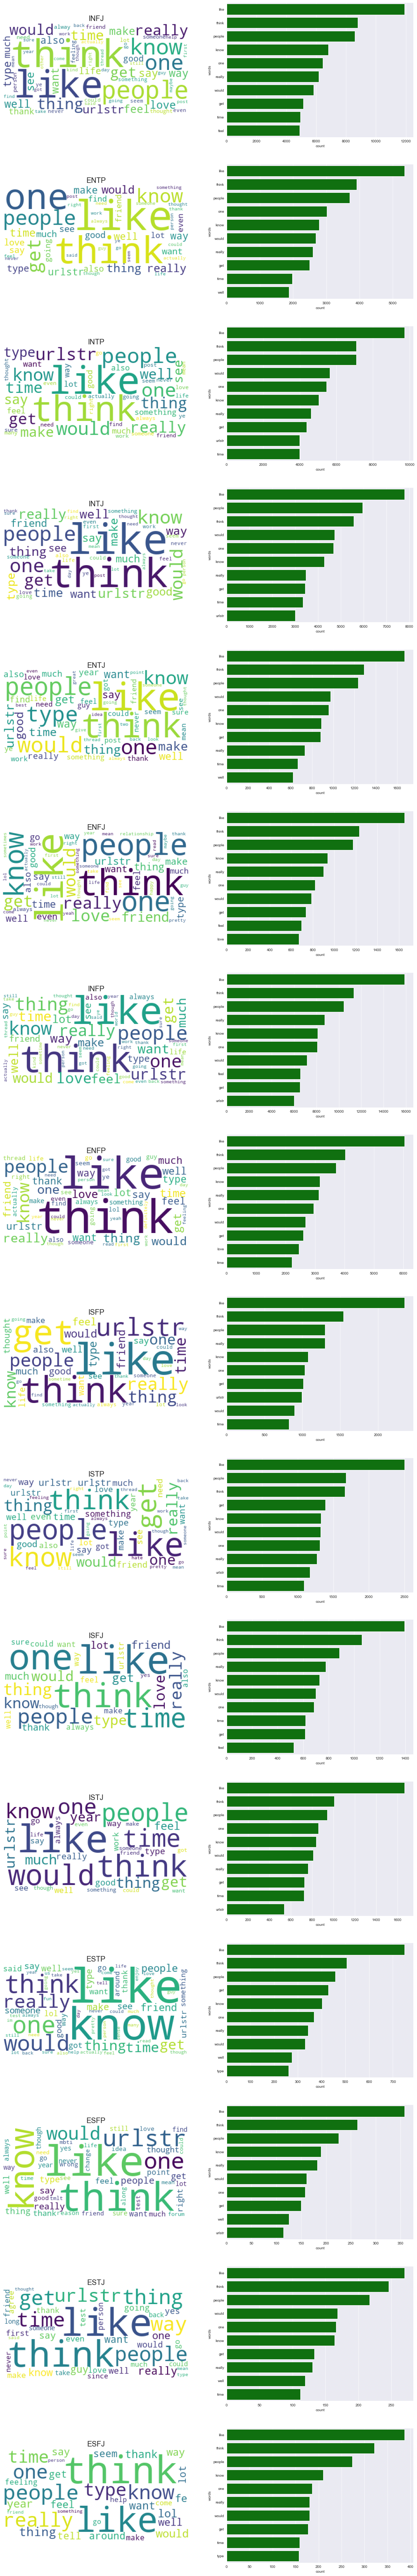

In [58]:
fig, ax = plt.subplots(nrows=len(df['type'].unique()), ncols=2, figsize=(20,8*len(df['type'].unique())))

k = 0
for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud(min_font_size=10, 
                          background_color ='white',
                          normalize_plurals=True,
                          stopwords=type_stopwords,
                         repeat=False).generate(df_4['cleaned_str'].to_string())
    ax[k][0].imshow(wordcloud) #, interpolation='bilinear'
    ax[k][0].set_title(i, fontsize = 20)
    ax[k][0].axis("off")
    
    type_str = " ".join(r for r in df_4['cleaned_str'])
    #plotting the top 10 words for each type
    findcommonwords(type_str, isstr=True, num_words=10, plot=True, color='green', ax=ax[k][1])
    
    k += 1

From the word cloud and the graphs of the most common words, there is alot of similiarities among the types. Practically all the types have lots of occurances of 'like', 'think', 'people', 'would', 'really', these should be removed during the modelling

### Mapping out each type based on Axis

In [59]:
#mapping of personality types

map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}

#separating from I/E
df['ie'] = df['type'].astype(str).str[0]
#df['ie'] = df['ie'].map(map1)

#separating from N/S
df['ns'] = df['type'].astype(str).str[1]
#df['ns'] = df['ns'].map(map2)

#separating from T/F
df['tf'] = df['type'].astype(str).str[2]
#df['tf'] = df['tf'].map(map3)

#separating from J/P
df['jp'] = df['type'].astype(str).str[3]
#df['jp'] = df['jp'].map(map4)
df.head(10)

,type,posts,num_posts,num_http,words_per_comment,nouns_per_commment,verbs_per_comment,adj_per_comment,interject_per_comment,cleaned_str,ie,ns,tf,jp
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-chan...,50,24,16.060,2.600,1.600,1.020,0.080,urlstr moments urlstr sportscenter top ten plays urlstr pranks life changing experience life urlstr urlstr repeat today may perc experience immerse last thing friend posted facebook committing suicide next day rest peace urlstr sorry hear distress natural relationship perfection time every momen...,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|...,50,10,26.820,3.660,3.500,1.860,0.180,finding lack posts alarming sex boring position often example girlfriend currently environment creatively use cowgirl missionary enough giving new meaning game theory hello grin takes converse flirting acknowledge presence return words smooth wordplay cheeky grins lack balance hand eye coordinat...,E,N,T,P
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I ...",50,5,18.660,2.960,2.540,1.680,0.240,good one urlstr course say know blessing curse absolutely positive best friend could amazing couple count yes could madly love case reconciled feelings thank link called ti si loop stem current topic obsession deadly like stuck thoughts mind wanders circles feels truly terrible noticed peculiar ...,I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existe...",50,2,23.520,3.340,3.040,1.660,0.160,dear enjoyed conversation day esoteric gabbing nature universe idea every rule social code arbitrary constructs created dear sub long time see sincerely alpha none types hurt deep existential ways want part probably sliding scale depends individual preferences like everything humanity draco malf...,I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His ...,50,6,21.880,3.500,2.720,1.780,0.200,fired another silly misconception approaching logically going key unlocking whatever think entitled nobody wants approached bs guys really wants go super duper long ass vacation c mon guys boss listen get even approached logically everything never mind go permanent vacation two months crazy idea...,E,N,T,J
5,INTJ,"'18/37 @.@|||Science is not perfect. No scientist claims that it is, or that scientific information will not be revised as we discover new things. Rational thinking has been very useful to our society....|||INFP- Edgar Allen Poe was an INFP and he's in your siggy.|||People see the obvious Fi...",50,1,31.700,4.400,4.760,2.120,0.160,science perfect scientist claims scientific information revised discover new things rational thinking useful society edgar allen poe siggy people see obvious fi quick put agree ne see compare haku definite flat naruto lets get party started say disproved god merely s

In [60]:
ie_types = df['ie']
ns_types = df['ns']
tf_types = df['tf']
jp_types = df['jp']


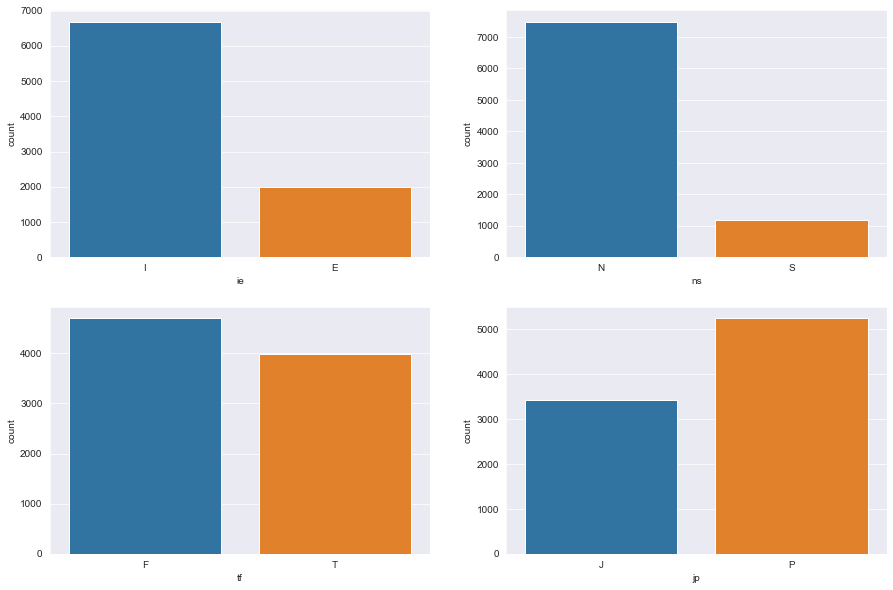

In [61]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10)) 
list_types = [ie_types, ns_types, tf_types, jp_types]
ax = ax.ravel()

for i, item in enumerate(list_types):
    #print(item)
    sns.countplot(item, ax=ax[i])


The dataset for the I-E axis and the N-S axis is also very imbalanced. To be able to run binary classifications for the axes, resampling is also needed

## Saving dataframe to file for modelling use

In [76]:
#final check on data before writing to file
df.columns

Index(['type', 'posts', 'num_posts', 'num_http', 'words_per_comment',
       'nouns_per_commment', 'verbs_per_comment', 'adj_per_comment',
       'interject_per_comment', 'cleaned_str', 'ie', 'ns', 'tf', 'jp'],
      dtype='object')

In [77]:
df.head(2)

,type,posts,num_posts,num_http,words_per_comment,nouns_per_commment,verbs_per_comment,adj_per_comment,interject_per_comment,cleaned_str,ie,ns,tf,jp
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-chan...,50,24,16.060,2.600,1.600,1.020,0.080,urlstr moments urlstr sportscenter top ten plays urlstr pranks life changing experience life urlstr urlstr repeat today may perc experience immerse last thing friend posted facebook committing suicide next day rest peace urlstr sorry hear distress natural relationship perfection time every momen...,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|...,50,10,26.820,3.660,3.500,1.860,0.180,finding lack posts alarming sex boring position often example girlfriend currently environment creatively use cowgirl missionary enough giving new meaning game theory hello grin takes converse flirting acknowledge presence return words smooth wordplay cheeky grins lack balance hand eye coordinat...,E,N,T,P


In [78]:
#saving the file for modelling
#df.to_csv('/content/drive/My Drive/Data Science/GA DSI/Working files/DSI Working/Project1234/Project-capstone project/datasets/mbti_cleaned.csv')
df.to_csv('data/mbti_cleaned.csv')

Next, we move on to the modelling part:
- [Multiclass modelling](Capstone_Personality_Prediction_Multiclass_Modelling.ipynb)
- [Binary class modelling](Capstone_Personality_Prediction_Binary_Modelling.ipynb)